In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [56]:
# load data

boston = load_boston()
x = pd.DataFrame(data=boston.data, columns=boston.feature_names)
#x.head()
y = pd.DataFrame(data=boston.target, columns=['target_price'] )
y.head()

,target_price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [55]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston.DESCR.split(sep='\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [49]:
gb = GradientBoostingRegressor(n_estimators=10,learning_rate=0.1,max_depth=8)

In [50]:
model = gb.fit(X=X_train,y=y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [51]:
y_pred = model.predict(X_test)

In [52]:
r2_score(y_test,y_pred)

0.7330608764296481

In [58]:
feature_importance = gb.feature_importances_
feature_importance

array([4.10208539e-02, 3.71837560e-04, 3.90276626e-03, 2.59057399e-04,
       7.89009410e-03, 3.11358684e-01, 8.80414963e-03, 8.80692036e-02,
       8.70581829e-03, 6.80212220e-03, 1.16499840e-02, 1.63268307e-02,
       4.94838598e-01])

In [78]:
# Scaling of feature_importance
feature_importance = 100 * (feature_importance/feature_importance.max())

In [79]:
sorted_Idx = np.argsort(feature_importance)   # ****

In [80]:
pos = np.arange(sorted_Idx.shape[0]) + 0.5    # ****

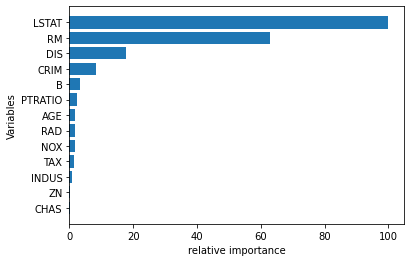

In [81]:
plt.barh(pos,feature_importance[sorted_Idx],align='center')
plt.yticks(pos,labels=boston.feature_names[sorted_Idx])
plt.ylabel('Variables')
plt.xlabel('relative importance')
plt.show()

In [25]:
## Hyperparameter Tuning

In [88]:
params = {'n_estimators' : [10,20,30,50,80,100],
         'max_depth' : [2,4,8,16,20,32],
          'max_leaf_nodes' : [5,8,12,16,20,25,32],
         'learning_rate' : [0.1, 0.01, 0.2, 0.001]}

In [89]:
gbh = GradientBoostingRegressor()
grid_gbh = GridSearchCV(gbh, param_grid=params,cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=3)

In [90]:
grid_gbh.fit(X_train,y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.2, 0.001],
                         'max_depth': [2, 4, 8, 16, 20, 32],
                         'max_leaf_nodes': [5, 8, 12, 16, 20, 25, 32],
                         'n_estimators': [10, 20, 30, 50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [91]:
grid_gbh.best_params_

{'learning_rate': 0.1,
 'max_depth': 16,
 'max_leaf_nodes': 8,
 'n_estimators': 80}

In [92]:
grid_gbh.best_score_

-13.994383365646163